In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
salary = pd.read_csv('Final.csv')
salary.head()

,Unnamed: 0,Player,season,NBA_Salary,Class,Pos,School,Conf,G,MP,...,PPG,APG,TRB/G,STL/G,TOV/G,BLK/G,3P%,FG%,eFG%,sal_as_%
0,0,A.J. Hammons,2016,650000,4,C,Purdue,Big Ten,33,813.0,...,14.969697,1.121212,8.181818,0.272727,1.969697,2.545455,0.545455,0.592262,0.601190,0.006904
1,1,A.J. Price,2009,62552,4,G,Connecticut,Big East,35,1112.0,...,14.714286,4.685714,3.485714,0.685714,2.685714,0.000000,0.401961,0.407674,0.505995,0.001084
2,2,Aaron Brooks,2007,972720,4,G,Oregon,Pac-10,35,1289.0,...,17.742857,4.257143,4.257143,1.371429,2.542857,0.171429,0.404040,0.460043,0.546436,0.017486
3,3,Aaron Gray,2007,427163,4,C,Pittsburgh,Big East,36,1016.0,...,13.861111,1.694444,9.472222,0.416667,1.527778,1.722222,0.000000,0.565097,0.565097,0.007679
4,4,Acie Law,2007,203057,4,G,Texas A&M,Big 12,34,1153.0,...,18.058824,4.970588,3.323529,1.147059,2.588235,0.029412,0.457831,0.500000,0.543981,0.003650


In [3]:
per_36 = pd.read_csv('per_36_final.csv')

In [4]:
#Viewing all columns in the dataframe
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 37 columns):
Unnamed: 0    411 non-null int64
Player        411 non-null object
season        411 non-null int64
NBA_Salary    411 non-null int64
Class         411 non-null int64
Pos           411 non-null object
School        411 non-null object
Conf          411 non-null object
G             411 non-null int64
MP            411 non-null float64
FG            411 non-null int64
FGA           411 non-null int64
2P            411 non-null int64
2PA           411 non-null int64
3P            411 non-null int64
3PA           411 non-null int64
FT            411 non-null int64
FTA           411 non-null int64
ORB           411 non-null float64
DRB           411 non-null float64
TRB           411 non-null int64
AST           411 non-null int64
STL           411 non-null int64
BLK           411 non-null int64
TOV           411 non-null float64
PF            411 non-null float64
PTS           411 non-n

In [5]:
#Dropping the redundant column (Unnamed = 0)
salary = salary.drop(columns = 'Unnamed: 0')

In [6]:
salary

,Player,season,NBA_Salary,Class,Pos,School,Conf,G,MP,FG,...,PPG,APG,TRB/G,STL/G,TOV/G,BLK/G,3P%,FG%,eFG%,sal_as_%
0,A.J. Hammons,2016,650000,4,C,Purdue,Big Ten,33,813.0,199,...,14.969697,1.121212,8.181818,0.272727,1.969697,2.545455,0.545455,0.592262,0.601190,0.006904
1,A.J. Price,2009,62552,4,G,Connecticut,Big East,35,1112.0,170,...,14.714286,4.685714,3.485714,0.685714,2.685714,0.000000,0.401961,0.407674,0.505995,0.001084
2,Aaron Brooks,2007,972720,4,G,Oregon,Pac-10,35,1289.0,213,...,17.742857,4.257143,4.257143,1.371429,2.542857,0.171429,0.404040,0.460043,0.546436,0.017486
3,Aaron Gray,2007,427163,4,C,Pittsburgh,Big East,36,1016.0,204,...,13.861111,1.694444,9.472222,0.416667,1.527778,1.722222,0.000000,0.565097,0.565097,0.007679
4,Acie Law,2007,203057,4,G,Texas A&M,Big 12,34,1153.0,216,...,18.058824,4.970588,3.323529,1.147059,2.588235,0.029412,0.457831,0.500000,0.543981,0.003650
5,Adam Morrison,2006,3616680,3,F,Gonzaga,WCC,33,1205.0,306,...,28.060606,1.696970,5.515152,1.060606,2.303030,0.333333,0.427746,0.495948,0.555916,0.068066
6,Al Horford,2007,3745800,3,F,Florida,SEC,38,1057.0,186,...,13.210526,2.157895,9.473684,0.736842,1.789474,1.842105,0.000000,0.607843,0.607843,0.067334
7,Al Thornton,2007,1652280,4,G,Florida State,ACC,35,1092.0,244,...,19.714286,0.685714,7.171429,1.514286,2.485714,1.142857,0.444444,0.530435,0.569565,0.029701
8,Al-Farouq Aminu,2010,981084,2,F,Wake Forest,ACC,31,970.0,167,...,15.838710,1.322581,10.709677,1.419355,3.193548,1.419355,0.272727,0.446524,0.470588,0.016902
9,Alando Tucker,2007,931920,4,G,Wisconsin,Big Ten,36,1181.0,256,...,19.888889,2.027778,5.444444,0.916667,1.666667,0.277778,0.325203,0.469725,0.506422,0.016752


Now that we have a clean dataset, we want to explore the relationships between the NBA 
salary and different statistics from the last year each player played in college. Are there any college statistics that contribute to their NBA salary?

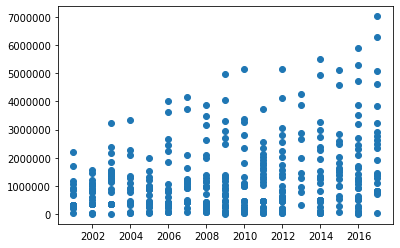

In [7]:
#Creating a scatterplot to show the first year salary throughout the years
plt.scatter('season','NBA_Salary', data = salary)

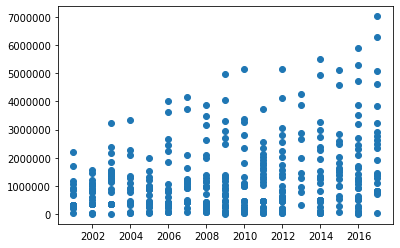

In [8]:
plt.scatter('season', 'NBA_Salary', data = salary)

We see that there is an increasing first year salary throughout the years. Are there any other patterns that we can find?

[Text(0, 0.5, 'Salary as a % of the salary cap'), Text(0.5, 0, 'Class')]

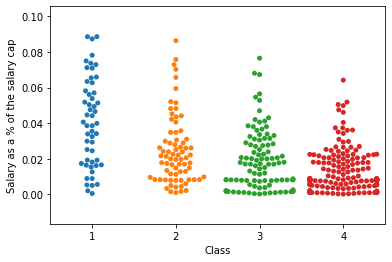

In [9]:
sp = sns.swarmplot('Class', 'sal_as_%', data = salary)
sp.set(xlabel = 'Class', ylabel = 'Salary as a % of the salary cap')

There is a wider spread for rookies that play less years in college. It appears that the longer that the player stays in college, the lower their rookie salary will be. What about the correlation coefficient for NBA salary vs Class?

Next we want to view the relationships between stats and salary throughout the NBA coming out of college.

Text(0, 0.5, 'Rookie Salary')

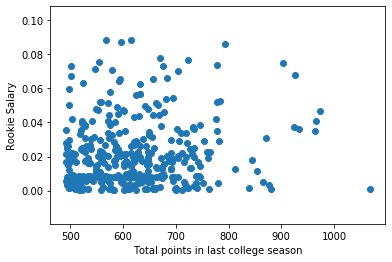

In [10]:
#PTS vs Salary
plt.scatter('PTS','sal_as_%', data = salary)
plt.xlabel('Total points in last college season')
plt.ylabel('Rookie Salary')

In [11]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 36 columns):
Player        411 non-null object
season        411 non-null int64
NBA_Salary    411 non-null int64
Class         411 non-null int64
Pos           411 non-null object
School        411 non-null object
Conf          411 non-null object
G             411 non-null int64
MP            411 non-null float64
FG            411 non-null int64
FGA           411 non-null int64
2P            411 non-null int64
2PA           411 non-null int64
3P            411 non-null int64
3PA           411 non-null int64
FT            411 non-null int64
FTA           411 non-null int64
ORB           411 non-null float64
DRB           411 non-null float64
TRB           411 non-null int64
AST           411 non-null int64
STL           411 non-null int64
BLK           411 non-null int64
TOV           411 non-null float64
PF            411 non-null float64
PTS           411 non-null int64
PPG           411 non-n

Text(0, 0.5, 'Rookie Salary')

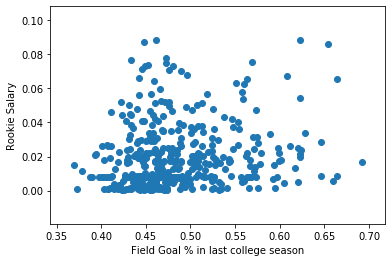

In [12]:
plt.scatter('FG%', 'sal_as_%', data = salary)
plt.xlabel('Field Goal % in last college season')
plt.ylabel('Rookie Salary')

Text(0, 0.5, 'Rookie Salary')

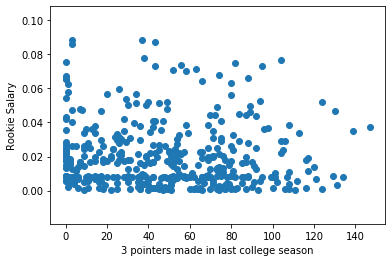

In [13]:
plt.scatter('3P', 'sal_as_%', data = salary)
plt.xlabel('3 pointers made in last college season')
plt.ylabel('Rookie Salary')

Text(0, 0.5, 'Rookie Salary')

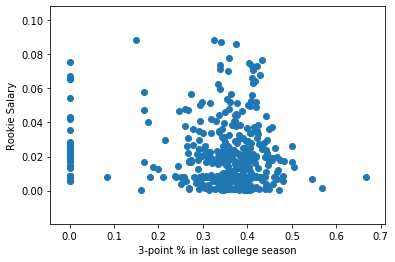

In [14]:
plt.scatter('3P%', 'sal_as_%', data = salary)
plt.xlabel('3-point % in last college season')
plt.ylabel('Rookie Salary')

Text(0, 0.5, 'Rookie Salary')

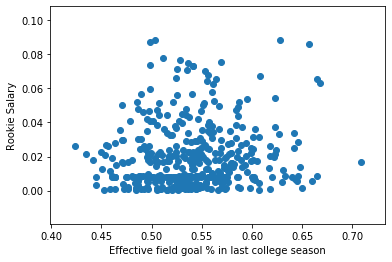

In [15]:
#eFG is a (abbreviated eFG%) is a statistic that adjusts field goal percentage to account for the fact that 
#three-point field goals count for three points while field goals only count for two points.
plt.scatter('eFG%', 'sal_as_%', data = salary)
plt.xlabel('Effective field goal % in last college season')
plt.ylabel('Rookie Salary')

Text(0, 0.5, 'Rookie Salary')

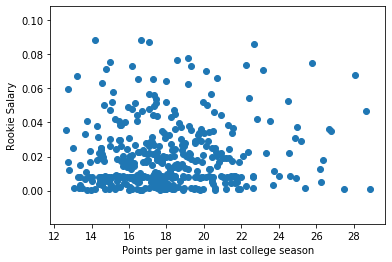

In [16]:
plt.scatter('PPG', 'sal_as_%', data = salary)
plt.xlabel('Points per game in last college season')
plt.ylabel('Rookie Salary')

Points are not a very good explanatory variable for salary earned in the first year

Text(0, 0.5, 'Rookie Salary')

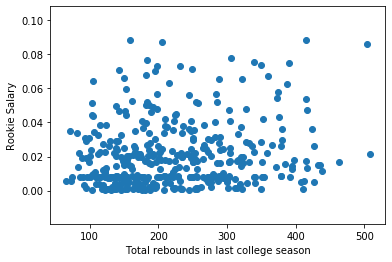

In [17]:
plt.scatter('TRB','sal_as_%', data = salary)
plt.xlabel('Total rebounds in last college season')
plt.ylabel('Rookie Salary')

Text(0, 0.5, 'Rookie Salary')

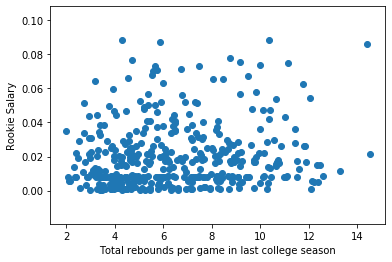

In [18]:
plt.scatter('TRB/G', 'sal_as_%', data = salary)
plt.xlabel('Total rebounds per game in last college season')
plt.ylabel('Rookie Salary')

Total rebounds isn't a very good predictor for salary

Text(0, 0.5, 'Rookie Salary')

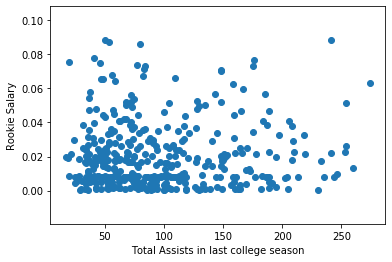

In [19]:
plt.scatter('AST','sal_as_%', data = salary)
plt.xlabel('Total Assists in last college season')
plt.ylabel('Rookie Salary')

Text(0, 0.5, 'Rookie Salary')

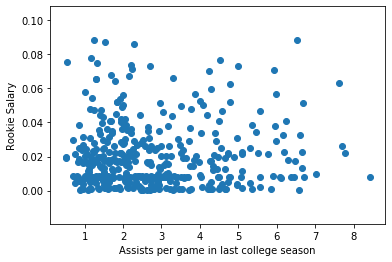

In [20]:
plt.scatter('APG', 'sal_as_%', data = salary)
plt.xlabel('Assists per game in last college season')
plt.ylabel('Rookie Salary')

Text(0, 0.5, 'Rookie Salary')

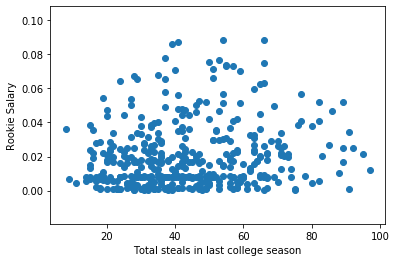

In [21]:
plt.scatter('STL', 'sal_as_%', data = salary)
plt.xlabel('Total steals in last college season')
plt.ylabel('Rookie Salary')

Text(0, 0.5, 'Rookie Salary')

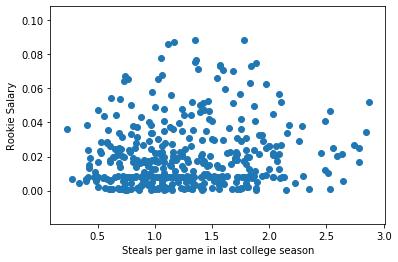

In [22]:
plt.scatter('STL/G', 'sal_as_%', data = salary)
plt.xlabel('Steals per game in last college season')
plt.ylabel('Rookie Salary')

Text(0, 0.5, 'Rookie Salary')

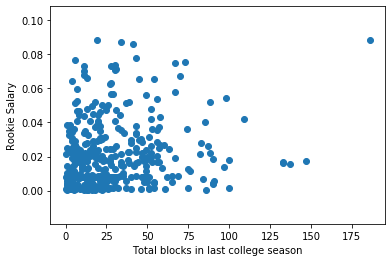

In [23]:
plt.scatter('BLK', 'sal_as_%', data = salary)
plt.xlabel('Total blocks in last college season')
plt.ylabel('Rookie Salary')

Text(0, 0.5, 'Rookie Salary')

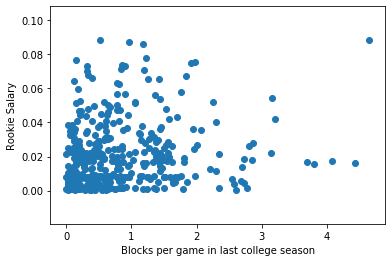

In [24]:
plt.scatter('BLK/G', 'sal_as_%', data = salary)
plt.xlabel('Blocks per game in last college season')
plt.ylabel('Rookie Salary')

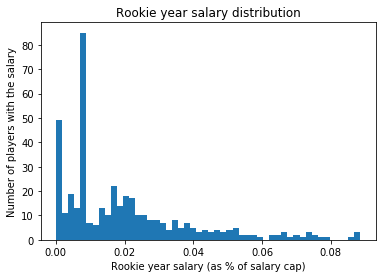

In [83]:
plt.hist('sal_as_%', bins = 50, data = salary)
plt.xlabel('Rookie year salary (as % of salary cap)')
plt.ylabel('Number of players with the salary')
plt.title('Rookie year salary distribution')
plt.show()


The above is a distribution of the first year rookie salaries. We can see that most rookie salaries make very little compared to the high end ones. 

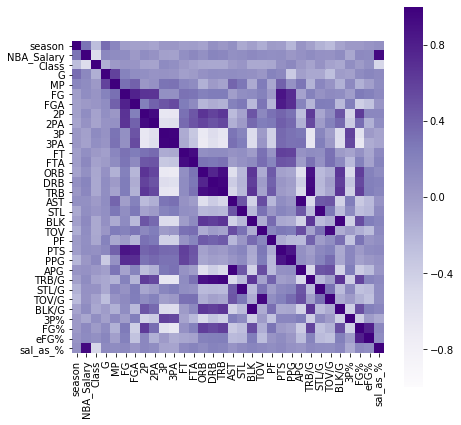

In [26]:
#Correlation matrix heat map
plt.figure(figsize = (7,7))
heat_map = sns.heatmap(salary.corr(), 
                      vmin = -1,
                      vmax = 1,
                      center = 0,
                       cmap = 'Purples',
                       xticklabels = True,
                       yticklabels = True,
                      square = True)

From the correlation matrix, we can see that a majority of the college statistics do not have a strong correlation with NBA salary.

Text(0.5, 1.0, 'Positions vs Salary as % of cap')

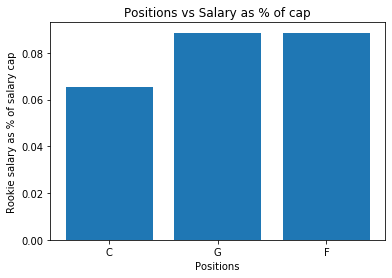

In [27]:
plt.bar('Pos', 'sal_as_%',data = salary)
plt.xlabel('Positions')
plt.ylabel('Rookie salary as % of salary cap')
plt.title('Positions vs Salary as % of cap')

In [28]:
salary.corr(method = 'pearson')

,season,NBA_Salary,Class,G,MP,FG,FGA,2P,2PA,3P,...,PPG,APG,TRB/G,STL/G,TOV/G,BLK/G,3P%,FG%,eFG%,sal_as_%
season,1.000000,0.301915,-0.254693,0.342147,0.170669,-0.029390,-0.045063,-0.040667,-0.070671,0.025368,...,-0.202535,0.049433,-0.042397,-0.164759,-0.239058,-0.063572,0.013442,0.014411,0.047625,0.082723
NBA_Salary,0.301915,1.000000,-0.535309,0.156229,0.117763,0.113431,0.014252,0.116194,0.068078,-0.042591,...,0.027082,0.077619,0.117735,0.076945,0.070055,0.122478,-0.087153,0.142461,0.127311,0.938823
Class,-0.254693,-0.535309,1.000000,-0.153843,0.008386,0.050627,0.044729,-0.054751,-0.064046,0.125669,...,0.152149,0.020219,-0.067779,0.068614,-0.055384,-0.093760,0.103427,-0.001267,0.088458,-0.473962
G,0.342147,0.156229,-0.153843,1.000000,0.590472,0.200567,0.113957,0.098834,0.057553,0.069380,...,-0.366747,-0.035425,-0.099458,-0.097575,-0.272718,-0.008598,-0.042424,0.120173,0.174301,0.134565
MP,0.170669,0.117763,0.008386,0.590472,1.000000,0.327873,0.413608,0.025982,0.074818,0.297416,...,0.077487,0.291429,-0.176130,0.164577,0.057226,-0.163701,0.142494,-0.162187,-0.037197,0.119855
FG,-0.029390,0.113431,0.050627,0.200567,0.327873,1.000000,0.774391,0.679456,0.670727,0.092577,...,0.714971,-0.060347,0.204944,0.062960,0.134069,0.114228,-0.019853,0.260563,0.214138,0.147153
FGA,-0.045063,0.014252,0.044729,0.113957,0.413608,0.774391,1.000000,0.222248,0.405042,0.484127,...,0.710631,0.188060,-0.188706,0.243454,0.236969,-0.222914,0.226571,-0.400584,-0.302522,0.041014
2P,-0.040667,0.116194,-0.054751,0.098834,0.025982,0.679456,0.222248,1.000000,0.932662,-0.667663,...,0.309892,-0.251917,0.631433,-0.082185,0.120195,0.470406,-0.450401,0.632661,0.159396,0.159048
2PA,-0.070671,0.068078,-0.064046,0.057553,0.074818,0.670727,0.405042,0.932662,1.000000,-0.585137,...,0.365309,-0.160763,0.540567,-0.008577,0.207337,0.365718,-0.371026,0.341121,-0.158393,0.116615
3P,0.025368,-0.042591,0.125669,0.069380,0.297416,0.092577,0.484127,-0.667663,-0.585137,1.000000,...,0.304898,0.280638,-0.648954,0.175414,-0.027081,-0.522474,0.591083,-0.594187,0.000963,-0.066531


In [29]:
#Displaying all the pearson correlation coefficients for NBA Salary
c = salary.corr(method = 'pearson')
test = c.loc[:,'sal_as_%']
c

,season,NBA_Salary,Class,G,MP,FG,FGA,2P,2PA,3P,...,PPG,APG,TRB/G,STL/G,TOV/G,BLK/G,3P%,FG%,eFG%,sal_as_%
season,1.000000,0.301915,-0.254693,0.342147,0.170669,-0.029390,-0.045063,-0.040667,-0.070671,0.025368,...,-0.202535,0.049433,-0.042397,-0.164759,-0.239058,-0.063572,0.013442,0.014411,0.047625,0.082723
NBA_Salary,0.301915,1.000000,-0.535309,0.156229,0.117763,0.113431,0.014252,0.116194,0.068078,-0.042591,...,0.027082,0.077619,0.117735,0.076945,0.070055,0.122478,-0.087153,0.142461,0.127311,0.938823
Class,-0.254693,-0.535309,1.000000,-0.153843,0.008386,0.050627,0.044729,-0.054751,-0.064046,0.125669,...,0.152149,0.020219,-0.067779,0.068614,-0.055384,-0.093760,0.103427,-0.001267,0.088458,-0.473962
G,0.342147,0.156229,-0.153843,1.000000,0.590472,0.200567,0.113957,0.098834,0.057553,0.069380,...,-0.366747,-0.035425,-0.099458,-0.097575,-0.272718,-0.008598,-0.042424,0.120173,0.174301,0.134565
MP,0.170669,0.117763,0.008386,0.590472,1.000000,0.327873,0.413608,0.025982,0.074818,0.297416,...,0.077487,0.291429,-0.176130,0.164577,0.057226,-0.163701,0.142494,-0.162187,-0.037197,0.119855
FG,-0.029390,0.113431,0.050627,0.200567,0.327873,1.000000,0.774391,0.679456,0.670727,0.092577,...,0.714971,-0.060347,0.204944,0.062960,0.134069,0.114228,-0.019853,0.260563,0.214138,0.147153
FGA,-0.045063,0.014252,0.044729,0.113957,0.413608,0.774391,1.000000,0.222248,0.405042,0.484127,...,0.710631,0.188060,-0.188706,0.243454,0.236969,-0.222914,0.226571,-0.400584,-0.302522,0.041014
2P,-0.040667,0.116194,-0.054751,0.098834,0.025982,0.679456,0.222248,1.000000,0.932662,-0.667663,...,0.309892,-0.251917,0.631433,-0.082185,0.120195,0.470406,-0.450401,0.632661,0.159396,0.159048
2PA,-0.070671,0.068078,-0.064046,0.057553,0.074818,0.670727,0.405042,0.932662,1.000000,-0.585137,...,0.365309,-0.160763,0.540567,-0.008577,0.207337,0.365718,-0.371026,0.341121,-0.158393,0.116615
3P,0.025368,-0.042591,0.125669,0.069380,0.297416,0.092577,0.484127,-0.667663,-0.585137,1.000000,...,0.304898,0.280638,-0.648954,0.175414,-0.027081,-0.522474,0.591083,-0.594187,0.000963,-0.066531


In [30]:
c_36 = salary.corr(method = 'pearson')
c_36.loc[:,'sal_as_%']

season        0.082723
NBA_Salary    0.938823
Class        -0.473962
G             0.134565
MP            0.119855
FG            0.147153
FGA           0.041014
2P            0.159048
2PA           0.116615
3P           -0.066531
3PA          -0.070791
FT            0.146446
FTA           0.189348
ORB           0.124088
DRB           0.195404
TRB           0.178139
AST           0.057760
STL           0.138736
BLK           0.183112
TOV           0.146095
PF            0.104875
PTS           0.143053
PPG           0.070496
APG           0.044793
TRB/G         0.142421
STL/G         0.114566
TOV/G         0.102578
BLK/G         0.165515
3P%          -0.110028
FG%           0.152206
eFG%          0.113904
sal_as_%      1.000000
Name: sal_as_%, dtype: float64

In [31]:
list_ = c_36.loc[:,'sal_as_%']
list_.sort_values()

Class        -0.473962
3P%          -0.110028
3PA          -0.070791
3P           -0.066531
FGA           0.041014
APG           0.044793
AST           0.057760
PPG           0.070496
season        0.082723
TOV/G         0.102578
PF            0.104875
eFG%          0.113904
STL/G         0.114566
2PA           0.116615
MP            0.119855
ORB           0.124088
G             0.134565
STL           0.138736
TRB/G         0.142421
PTS           0.143053
TOV           0.146095
FT            0.146446
FG            0.147153
FG%           0.152206
2P            0.159048
BLK/G         0.165515
TRB           0.178139
BLK           0.183112
FTA           0.189348
DRB           0.195404
NBA_Salary    0.938823
sal_as_%      1.000000
Name: sal_as_%, dtype: float64

From the correlation matrix, we can see that there are weak relationships between college stats and NBA rookie salaries. The only outstanding correlation coefficient is class at -0.47. This means on average every additional year spent in college reduces rookie salary by half.  

In [32]:
# Creating a correlation matrix grouped by position
salary['Pos'].head(10)

0    C
1    G
2    G
3    C
4    G
5    F
6    F
7    G
8    F
9    G
Name: Pos, dtype: object

In [33]:
#Querying by guards
guards = salary.query('Pos == "G"')
guards.head()

,Player,season,NBA_Salary,Class,Pos,School,Conf,G,MP,FG,...,PPG,APG,TRB/G,STL/G,TOV/G,BLK/G,3P%,FG%,eFG%,sal_as_%
1,A.J. Price,2009,62552,4,G,Connecticut,Big East,35,1112.0,170,...,14.714286,4.685714,3.485714,0.685714,2.685714,0.000000,0.401961,0.407674,0.505995,0.001084
2,Aaron Brooks,2007,972720,4,G,Oregon,Pac-10,35,1289.0,213,...,17.742857,4.257143,4.257143,1.371429,2.542857,0.171429,0.404040,0.460043,0.546436,0.017486
4,Acie Law,2007,203057,4,G,Texas A&M,Big 12,34,1153.0,216,...,18.058824,4.970588,3.323529,1.147059,2.588235,0.029412,0.457831,0.500000,0.543981,0.003650
7,Al Thornton,2007,1652280,4,G,Florida State,ACC,35,1092.0,244,...,19.714286,0.685714,7.171429,1.514286,2.485714,1.142857,0.444444,0.530435,0.569565,0.029701
9,Alando Tucker,2007,931920,4,G,Wisconsin,Big Ten,36,1181.0,256,...,19.888889,2.027778,5.444444,0.916667,1.666667,0.277778,0.325203,0.469725,0.506422,0.016752


In [34]:
guards_r = guards.corr(method = 'pearson')
guards_r.loc[:,'sal_as_%']

season        0.133573
NBA_Salary    0.937288
Class        -0.471148
G             0.088174
MP            0.148917
FG            0.093309
FGA           0.047572
2P            0.080034
2PA           0.044563
3P            0.008452
3PA           0.006630
FT            0.130098
FTA           0.156401
ORB           0.061743
DRB           0.177564
TRB           0.154344
AST           0.156635
STL           0.202178
BLK           0.251909
TOV           0.237993
PF            0.193655
PTS           0.119250
PPG           0.071166
APG           0.143466
TRB/G         0.118448
STL/G         0.178478
TOV/G         0.200565
BLK/G         0.249477
3P%          -0.012540
FG%           0.101959
eFG%          0.070311
sal_as_%      1.000000
Name: sal_as_%, dtype: float64

In [35]:
#Querying by guards using per 36 stats
guards_36 = per_36.query('Pos == "G"')
guards_36.head()

,Unnamed: 0,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,...,3P%,FG%,eFG%,Player,season,NBA_Salary,Class,Pos,cap,Sal_as_%
1,1,36.0,5.503597,13.500000,2.848921,6.895683,2.654676,6.604317,3.010791,4.176259,...,0.013013,0.013198,0.016381,A.J. Price,2009,62552,4,G,57700000,0.001084
2,2,36.0,5.948798,12.930954,3.714507,7.401086,2.234290,5.529868,3.211792,3.798293,...,0.011284,0.012848,0.015261,Aaron Brooks,2007,972720,4,G,55630000,0.017486
4,4,36.0,6.744146,13.488291,5.557676,10.896791,1.186470,2.591500,4.496097,5.776236,...,0.014295,0.015611,0.016985,Acie Law,2007,203057,4,G,55630000,0.003650
7,7,36.0,8.043956,15.164835,6.857143,12.494505,1.186813,2.670330,5.472527,6.923077,...,0.014652,0.017487,0.018777,Al Thornton,2007,1652280,4,G,55630000,0.029701
9,9,36.0,7.803556,16.613040,6.584251,12.863675,1.219306,3.749365,4.999153,7.590178,...,0.009913,0.014318,0.015437,Alando Tucker,2007,931920,4,G,55630000,0.016752


In [36]:
guards_r_36 = guards_36.corr(method = 'pearson')
guards_r_36.loc[:,'Sal_as_%']

Unnamed: 0   -0.093933
MP                 NaN
FG            0.011017
FGA          -0.038956
2P            0.030990
2PA          -0.007250
3P           -0.029827
3PA          -0.036948
FT            0.087147
FTA           0.108826
ORB           0.027045
DRB           0.125076
TRB           0.099741
AST           0.127594
STL           0.161513
BLK           0.240034
TOV           0.176698
PF            0.112111
PTS           0.037280
PPG          -0.003618
APG           0.112957
TRB/G         0.065681
STL/G         0.136111
TOV/G         0.132198
BLK/G         0.238159
3P%          -0.088463
FG%          -0.046794
eFG%         -0.065823
season        0.133573
NBA_Salary    0.937288
Class        -0.471148
cap           0.114364
Sal_as_%      1.000000
Name: Sal_as_%, dtype: float64

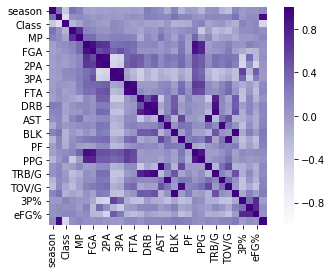

In [37]:
#Correlation matrix heat map
heat_map_guards = sns.heatmap(guards.corr(), 
                      vmin = -1,
                      vmax = 1,
                      center = 0,
                       cmap = 'Purples',
                      square = True)

In [38]:
#Querying by Forwards
forwards = salary.query('Pos == "F"')
forwards.head()

,Player,season,NBA_Salary,Class,Pos,School,Conf,G,MP,FG,...,PPG,APG,TRB/G,STL/G,TOV/G,BLK/G,3P%,FG%,eFG%,sal_as_%
5,Adam Morrison,2006,3616680,3,F,Gonzaga,WCC,33,1205.0,306,...,28.060606,1.696970,5.515152,1.060606,2.303030,0.333333,0.427746,0.495948,0.555916,0.068066
6,Al Horford,2007,3745800,3,F,Florida,SEC,38,1057.0,186,...,13.210526,2.157895,9.473684,0.736842,1.789474,1.842105,0.000000,0.607843,0.607843,0.067334
8,Al-Farouq Aminu,2010,981084,2,F,Wake Forest,ACC,31,970.0,167,...,15.838710,1.322581,10.709677,1.419355,3.193548,1.419355,0.272727,0.446524,0.470588,0.016902
16,Andrew Bogut,2005,242224,2,F,Utah,MWC,35,1224.0,281,...,20.428571,2.342857,12.200000,0.971429,2.742857,1.857143,0.360000,0.620309,0.630243,0.004893
18,Andrew Nicholson,2012,1418160,4,F,St. Bonaventure,A-10,32,962.0,220,...,18.468750,1.031250,8.406250,0.656250,2.500000,1.968750,0.433962,0.571429,0.601299,0.024432


In [39]:
forwards_r = forwards.corr(method = 'pearson')
forwards_r.loc[:,'sal_as_%']

season        0.033310
NBA_Salary    0.945104
Class        -0.469883
G             0.184755
MP            0.126504
FG            0.184206
FGA           0.078353
2P            0.203567
2PA           0.168383
3P           -0.096988
3PA          -0.098084
FT            0.174788
FTA           0.216155
ORB           0.158757
DRB           0.234690
TRB           0.228135
AST           0.014063
STL           0.163210
BLK           0.204895
TOV           0.019943
PF           -0.002600
PTS           0.186939
PPG           0.082497
APG          -0.005276
TRB/G         0.161619
STL/G         0.135553
TOV/G        -0.034026
BLK/G         0.165701
3P%          -0.153358
FG%           0.164728
eFG%          0.107497
sal_as_%      1.000000
Name: sal_as_%, dtype: float64

In [40]:
#Querying by Forwards using per 36 stats
forwards_36 = per_36.query('Pos == "F"')
forwards_36.head()

,Unnamed: 0,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,...,3P%,FG%,eFG%,Player,season,NBA_Salary,Class,Pos,cap,Sal_as_%
5,5,36.0,9.141909,18.433195,6.931120,13.264730,2.210788,5.168465,7.170124,9.291286,...,0.012779,0.014817,0.016608,Adam Morrison,2006,3616680,3,F,53135000,0.068066
6,6,36.0,6.334910,10.421949,6.334910,10.353832,0.000000,0.068117,4.427625,6.879849,...,0.000000,0.020702,0.020702,Al Horford,2007,3745800,3,F,55630000,0.067334
8,8,36.0,6.197938,13.880412,5.529897,11.430928,0.668041,2.449485,5.158763,7.385567,...,0.010122,0.016572,0.017465,Al-Farouq Aminu,2010,981084,2,F,58044000,0.016902
16,16,36.0,8.264706,13.323529,8.000000,12.588235,0.264706,0.735294,4.235294,6.117647,...,0.010588,0.018244,0.018537,Andrew Bogut,2005,242224,2,F,49500000,0.004893
18,18,36.0,8.232848,14.407484,7.372141,12.424116,0.860707,1.983368,4.790021,6.174636,...,0.016240,0.021384,0.022502,Andrew Nicholson,2012,1418160,4,F,58044000,0.024432


In [41]:
forwards_r_36 = forwards_36.corr(method = 'pearson')
forwards_r_36.loc[:,'Sal_as_%']

Unnamed: 0   -0.113286
MP                 NaN
FG            0.096868
FGA          -0.011289
2P            0.145083
2PA           0.105299
3P           -0.120577
3PA          -0.123260
FT            0.123280
FTA           0.165806
ORB           0.111047
DRB           0.188504
TRB           0.175551
AST           0.004050
STL           0.136000
BLK           0.170621
TOV          -0.011492
PF           -0.048977
PTS           0.093736
PPG          -0.005935
APG          -0.016316
TRB/G         0.102420
STL/G         0.104414
TOV/G        -0.058602
BLK/G         0.130713
3P%          -0.176601
FG%           0.041284
eFG%         -0.021619
season        0.033310
NBA_Salary    0.945104
Class        -0.469883
cap          -0.027539
Sal_as_%      1.000000
Name: Sal_as_%, dtype: float64

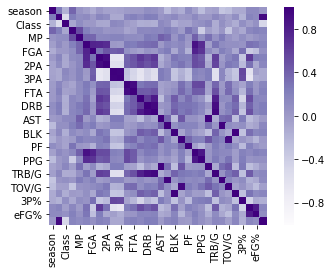

In [42]:
#Correlation matrix heat map
heat_map_forwards = sns.heatmap(forwards.corr(), 
                      vmin = -1,
                      vmax = 1,
                      center = 0,
                       cmap = 'Purples',
                      square = True)

In [43]:
#Querying by Centers
centers = salary.query('Pos == "C"')

In [44]:
centers_r = centers.corr(method = 'pearson')
centers_r.loc[:,'sal_as_%']

season        0.141163
NBA_Salary    0.953705
Class        -0.624932
G             0.180801
MP            0.205264
FG            0.305062
FGA           0.180904
2P            0.227416
2PA           0.105349
3P            0.198146
3PA           0.172274
FT            0.159150
FTA           0.190359
ORB           0.157779
DRB           0.164515
TRB           0.192633
AST           0.123185
STL           0.167873
BLK          -0.044698
TOV           0.318527
PF           -0.232396
PTS           0.350525
PPG           0.208201
APG           0.080549
TRB/G         0.128586
STL/G         0.133623
TOV/G         0.262747
BLK/G        -0.058675
3P%          -0.028318
FG%           0.155715
eFG%          0.205991
sal_as_%      1.000000
Name: sal_as_%, dtype: float64

In [45]:
#Querying by Centers using per 36 stats
centers_36 = per_36.query('Pos == "C"')
centers_36.head()

,Unnamed: 0,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,...,3P%,FG%,eFG%,Player,season,NBA_Salary,Class,Pos,cap,Sal_as_%
0,0,36.0,8.811808,14.878229,8.546125,14.391144,0.265683,0.487085,3.985240,5.623616,...,0.024153,0.026226,0.026621,A.J. Hammons,2016,650000,4,C,94143000,0.006904
3,3,36.0,7.228346,12.791339,7.228346,12.791339,0.000000,0.000000,3.224409,5.881890,...,0.000000,0.020023,0.020023,Aaron Gray,2007,427163,4,C,55630000,0.007679
44,44,36.0,5.580645,11.677419,4.935484,9.548387,0.645161,2.129032,4.290323,5.354839,...,0.009775,0.015416,0.016307,Brian Scalabrine,2001,332817,4,C,42500000,0.007831
55,55,36.0,8.338369,12.543807,8.338369,12.507553,0.000000,0.036254,6.453172,8.555891,...,0.000000,0.024099,0.024099,Carlos Boozer,2002,349458,3,C,40271000,0.008678
59,59,36.0,7.118467,12.857143,7.024390,12.324042,0.094077,0.533101,3.982578,4.797909,...,0.005534,0.017362,0.017477,Channing Frye,2005,2000000,4,C,49500000,0.040404


In [46]:
centers_r_36 = centers_36.corr(method = 'pearson')
centers_r_36.loc[:,'Sal_as_%']

Unnamed: 0   -0.026001
MP                 NaN
FG            0.137808
FGA           0.032045
2P            0.066532
2PA          -0.046289
3P            0.187624
3PA           0.163567
FT            0.056961
FTA           0.078604
ORB           0.068284
DRB           0.044079
TRB           0.062994
AST           0.079623
STL           0.123758
BLK          -0.094868
TOV           0.263825
PF           -0.278473
PTS           0.172758
PPG           0.052263
APG           0.031601
TRB/G         0.006490
STL/G         0.095909
TOV/G         0.207014
BLK/G        -0.101256
3P%          -0.056912
FG%          -0.056924
eFG%         -0.036268
season        0.141163
NBA_Salary    0.953705
Class        -0.624932
cap           0.045289
Sal_as_%      1.000000
Name: Sal_as_%, dtype: float64

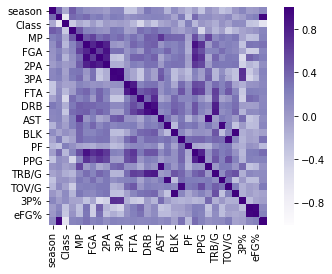

In [47]:
#Correlation matrix heat map
heat_map_centers = sns.heatmap(centers.corr(), 
                      vmin = -1,
                      vmax = 1,
                      center = 0,
                       cmap = 'Purples',
                      square = True)

In [48]:
#Creating an index of stats for a correlation dataframe
index_1 = ['season','NBA_Salary','Class','G','MP','FG','FGA','2P','2PA',
           '3P','3PA','FT','FTA','ORB','DRB','TRB','AST','STL','BLK','TOV','PF',
           'PTS','PPG','APG','TRB/G','STL/G','TOV/G','BLK/G','3P%','FG%','eFG%', 'sal_as_%']

In [49]:
columns = ['stats', 'guards', 'forwards', 'centers']
rows = index_1

Once I had queried by position, I found that stats that are not normally associated with the position most contributed to a higher rookie salary. For Guards the stat that had the highest correlation with higher salary was blocks (r = .25). For forwards that was rebounds (r = .23) and free throw attempts (r = 22). This translates to the forwards' willingness to get inside and draw contact. For centers the highest correlation coefficients were points (r = .35) and field goals (r = .31). Most notably, the players that stand out the most are exceptional in areas where they are not typically supposed to. 

In [50]:
#Creating columns reflecting the correlation between stats and salary by each position
guards_col = np.array(guards_r.loc[:,'sal_as_%'])
forwards_col = np.array(forwards_r.loc[:,'sal_as_%'])
centers_col = np.array(centers_r.loc[:,'sal_as_%'])

In [51]:
#Pulling together all the columns into a single dataframe
d2= {'': index_1,'guards' : guards_col, 'forwards': forwards_col, 'centers': centers_col}
corr_df2 = pd.DataFrame(data = d2)
corr_df2

,,guards,forwards,centers
0,season,0.133573,0.033310,0.141163
1,NBA_Salary,0.937288,0.945104,0.953705
2,Class,-0.471148,-0.469883,-0.624932
3,G,0.088174,0.184755,0.180801
4,MP,0.148917,0.126504,0.205264
5,FG,0.093309,0.184206,0.305062
6,FGA,0.047572,0.078353,0.180904
7,2P,0.080034,0.203567,0.227416
8,2PA,0.044563,0.168383,0.105349
9,3P,0.008452,-0.096988,0.198146


In [52]:
#Transforming the dataframe to be used for data visualizations
sliced = corr_df2.iloc[1:31,:]
corr_df3 = sliced
corr_df4 = corr_df3.T
corr_df5 = corr_df4.iloc[1:]
corr_df_header = corr_df4.iloc[0]
corr_df5.columns = corr_df_header
final_corr = corr_df5.T
final_ = final_corr.T
final_

,NBA_Salary,Class,G,MP,FG,FGA,2P,2PA,3P,3PA,...,PTS,PPG,APG,TRB/G,STL/G,TOV/G,BLK/G,3P%,FG%,eFG%
guards,0.937288,-0.471148,0.0881737,0.148917,0.0933094,0.0475716,0.080034,0.0445633,0.00845153,0.00663033,...,0.11925,0.0711663,0.143466,0.118448,0.178478,0.200565,0.249477,-0.0125402,0.101959,0.0703106
forwards,0.945104,-0.469883,0.184755,0.126504,0.184206,0.0783532,0.203567,0.168383,-0.0969885,-0.0980839,...,0.186939,0.0824972,-0.00527577,0.161619,0.135553,-0.0340257,0.165701,-0.153358,0.164728,0.107497
centers,0.953705,-0.624932,0.180801,0.205264,0.305062,0.180904,0.227416,0.105349,0.198146,0.172274,...,0.350525,0.208201,0.0805491,0.128586,0.133623,0.262747,-0.0586752,-0.0283176,0.155715,0.205991


In [53]:
final_ = final_.iloc[:2,:]

In [54]:
#Adding a column for positions that can be used as labels
positions = ['Guards', 'Forwards']
final_['positions'] = positions

/Users/arensimmons/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


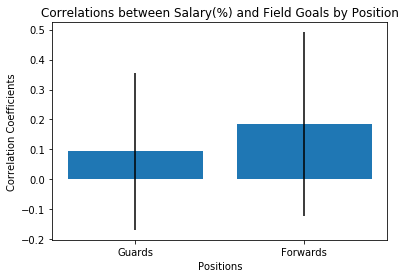

In [55]:
#Plotting differences in Field goal correlations
yer_FGA = [0.262, 0.307]
plt.bar('positions','FG', yerr= yer_FGA, data = final_)
plt.xlabel('Positions')
plt.ylabel('Correlation Coefficients')
plt.title('Correlations between Salary(%) and Field Goals by Position')
plt.show()

Text(0.5, 1.0, 'Correlations between Salary(%) and Blocks by Position')

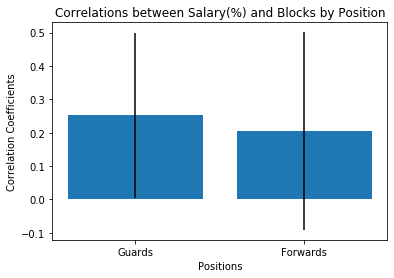

In [56]:
#Plotting differences in Blocks correlations
yer_blk = [0.246, 0.296]
plt.bar('positions','BLK', yerr = yer_blk, data = final_)
plt.xlabel('Positions')
plt.ylabel('Correlation Coefficients')
plt.title('Correlations between Salary(%) and Blocks by Position')

Text(0.5, 1.0, 'Correlations between Salary(%) and Defensive Rebounds by Position')

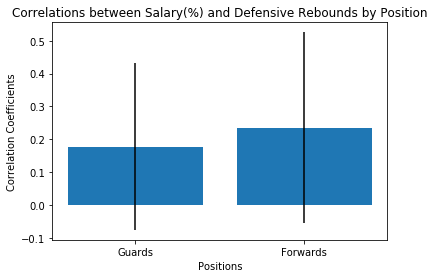

In [57]:
#Plotting differences in Defensive rebound correlations
yer_DRB = [0.2537, 0.291]
plt.bar('positions','DRB', yerr = yer_DRB, data = final_)
plt.xlabel('Positions')
plt.ylabel('Correlation Coefficients')
plt.title('Correlations between Salary(%) and Defensive Rebounds by Position')

Text(0.5, 1.0, 'Correlations between Salary(%) and Free Throw Attempts by Position')

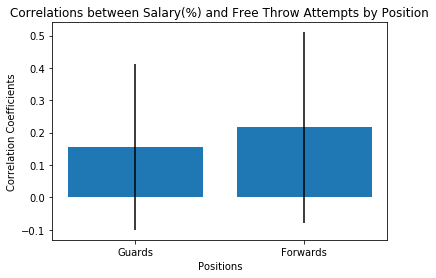

In [58]:
#Plotting differences in Defensive rebound correlations
yer_FTA = [0.25699999999999995, 0.294]
plt.bar('positions','FTA', yerr=yer_FTA, data = final_)
plt.xlabel('Positions')
plt.ylabel('Correlation Coefficients')
plt.title('Correlations between Salary(%) and Free Throw Attempts by Position')

Text(0.5, 1.0, 'Correlations between Salary(%) and Points by Position')

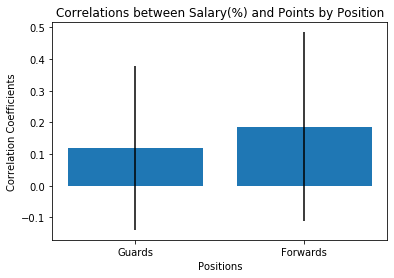

In [59]:
#Plotting differences in Points correlations
yer_PTS = [0.259, 0.29800000000000004]
plt.bar('positions','PTS', yerr = yer_PTS, data = final_)
plt.xlabel('Positions')
plt.ylabel('Correlation Coefficients')
plt.title('Correlations between Salary(%) and Points by Position')

Text(0.5, 1.0, 'Correlations between Salary(%) and Steals by Position')

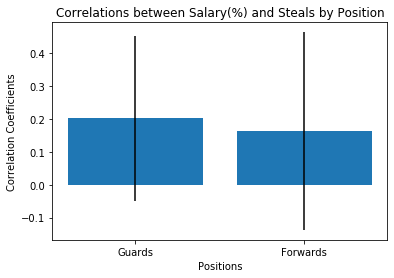

In [60]:
#Plotting differences in Steals correlations
yer_STL = [0.252, 0.301]
plt.bar('positions','STL', yerr= yer_STL, data = final_)
plt.xlabel('Positions')
plt.ylabel('Correlation Coefficients')
plt.title('Correlations between Salary(%) and Steals by Position')

(array([16.,  6., 12., 18., 13., 19., 10.,  5.,  7.,  8., 10.,  6., 15.,
         6.,  5.,  4.,  8.,  4.,  7.,  4.,  3.,  3.,  2.,  4.,  3.,  5.,
         1.,  3.,  1.,  2.,  1.,  2.,  0.,  0.,  1.,  0.,  1.,  2.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  1.]),
 array([ 0.  ,  1.08,  2.16,  3.24,  4.32,  5.4 ,  6.48,  7.56,  8.64,
         9.72, 10.8 , 11.88, 12.96, 14.04, 15.12, 16.2 , 17.28, 18.36,
        19.44, 20.52, 21.6 , 22.68, 23.76, 24.84, 25.92, 27.  , 28.08,
        29.16, 30.24, 31.32, 32.4 , 33.48, 34.56, 35.64, 36.72, 37.8 ,
        38.88, 39.96, 41.04, 42.12, 43.2 , 44.28, 45.36, 46.44, 47.52,
        48.6 , 49.68, 50.76, 51.84, 52.92, 54.  ]),
 <a list of 50 Patch objects>)

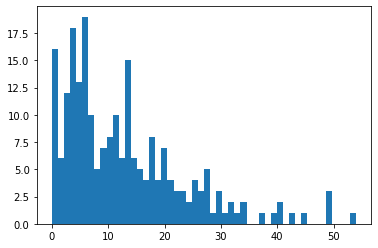

In [61]:
plt.hist('BLK', bins = 50, data = guards)

(array([3., 1., 4., 5., 1., 4., 2., 2., 2., 2.]),
 array([168. , 179.1, 190.2, 201.3, 212.4, 223.5, 234.6, 245.7, 256.8,
        267.9, 279. ]),
 <a list of 10 Patch objects>)

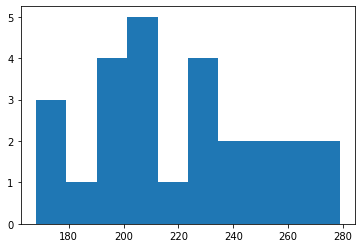

In [62]:
plt.hist('FG', data = centers)

(array([ 2.,  2.,  2.,  5.,  6.,  8.,  7.,  9., 10., 12., 12., 17., 10.,
        11.,  5.,  8.,  5.,  5.,  5.,  4.,  4.,  3.,  4.,  1.,  2.,  0.,
         0.,  1.,  1.,  1.]),
 array([ 78. ,  87.7,  97.4, 107.1, 116.8, 126.5, 136.2, 145.9, 155.6,
        165.3, 175. , 184.7, 194.4, 204.1, 213.8, 223.5, 233.2, 242.9,
        252.6, 262.3, 272. , 281.7, 291.4, 301.1, 310.8, 320.5, 330.2,
        339.9, 349.6, 359.3, 369. ]),
 <a list of 30 Patch objects>)

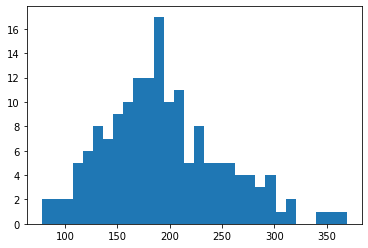

In [63]:
plt.hist('DRB', bins = 30, data = forwards)

(array([ 1.,  2.,  1.,  0.,  1.,  5.,  4., 10.,  6.,  5., 15., 10., 12.,
         7., 12., 17.,  8.,  7., 10.,  5.,  1.,  4.,  3.,  3.,  2.,  3.,
         1.,  3.,  1.,  3.]),
 array([ 61.        ,  70.16666667,  79.33333333,  88.5       ,
         97.66666667, 106.83333333, 116.        , 125.16666667,
        134.33333333, 143.5       , 152.66666667, 161.83333333,
        171.        , 180.16666667, 189.33333333, 198.5       ,
        207.66666667, 216.83333333, 226.        , 235.16666667,
        244.33333333, 253.5       , 262.66666667, 271.83333333,
        281.        , 290.16666667, 299.33333333, 308.5       ,
        317.66666667, 326.83333333, 336.        ]),
 <a list of 30 Patch objects>)

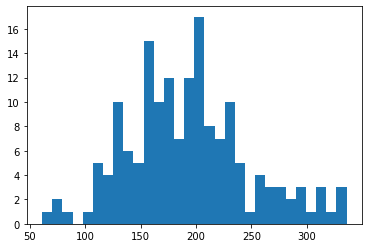

In [64]:
plt.hist('FTA', bins = 30, data = forwards)

Text(0.5, 0, 'Guards')

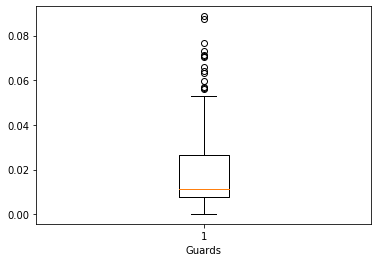

In [65]:
plt.boxplot('sal_as_%' ,data = guards)
plt.xlabel('Guards')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a20a316d8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a20a4ee48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a20a4e5f8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a20ac9518>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a20ac9860>],
 'means': []}

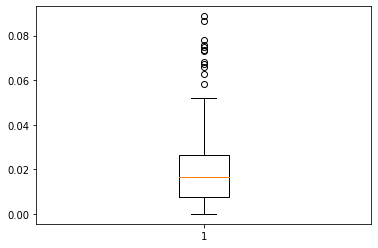

In [66]:
plt.boxplot('sal_as_%', data = forwards)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a20b85f98>,
 'caps': [<matplotlib.lines.Line2D at 0x1a20b936d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a20b85e48>],
 'medians': [<matplotlib.lines.Line2D at 0x1a20b93d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a20b93f60>],
 'means': []}

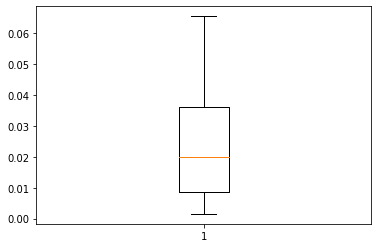

In [67]:
plt.boxplot('sal_as_%', data = centers)

In [68]:
guards_sal = guards['sal_as_%']
forwards_sal = forwards['sal_as_%']
centers_sal = centers['sal_as_%']

In [69]:
dict = {'Guards': guards_sal, 'Forwards': forwards_sal, 'Centers': centers_sal}

Text(0.5, 1.0, 'Salary(%) boxplots by position')

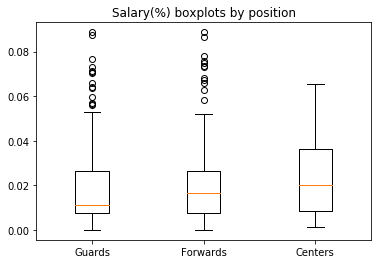

In [70]:
fig, ax = plt.subplots()
ax.boxplot(dict.values())
ax.set_xticklabels(dict.keys())
ax.set_title('Salary(%) boxplots by position')

In [71]:
guards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 1 to 410
Data columns (total 36 columns):
Player        223 non-null object
season        223 non-null int64
NBA_Salary    223 non-null int64
Class         223 non-null int64
Pos           223 non-null object
School        223 non-null object
Conf          223 non-null object
G             223 non-null int64
MP            223 non-null float64
FG            223 non-null int64
FGA           223 non-null int64
2P            223 non-null int64
2PA           223 non-null int64
3P            223 non-null int64
3PA           223 non-null int64
FT            223 non-null int64
FTA           223 non-null int64
ORB           223 non-null float64
DRB           223 non-null float64
TRB           223 non-null int64
AST           223 non-null int64
STL           223 non-null int64
BLK           223 non-null int64
TOV           223 non-null float64
PF            223 non-null float64
PTS           223 non-null int64
PPG           223 non-n

In [72]:
guards_dict = {'FG' : guards['FG'], 'FGA': guards['FGA'], '2P': guards['2P'], '2PA': guards['2PA'], 
               '3P': guards['3PA'], 'FT': guards['FT'], 'FTA': guards['FTA'], 'ORB': guards['ORB'], 
               'DRB': guards['DRB'], 'TRB': guards['TRB'], 'AST': guards['AST'], 'STL': guards['STL'], 
               'BLK': guards['BLK'], 'TOV': guards['TOV'], 'PF': guards['PF'], 'PTS': guards['PTS']}

Text(0.5, 1.0, 'Guards stat boxplots')

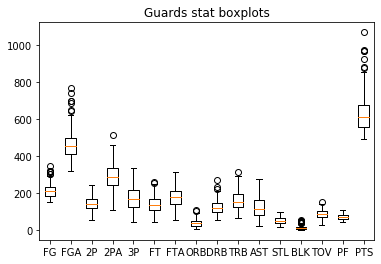

In [73]:
fig, ax = plt.subplots()
ax.boxplot(guards_dict.values())
ax.set_xticklabels(guards_dict.keys())
ax.set_title('Guards stat boxplots')

In [74]:
forwards_dict = {'FG' : forwards['FG'], 'FGA': forwards['FGA'], '2P': forwards['2P'], '2PA': forwards['2PA'], 
               '3P': forwards['3PA'], 'FT': forwards['FT'], 'FTA': forwards['FTA'], 'ORB':  forwards['ORB'], 
               'DRB': forwards['DRB'], 'TRB': forwards['TRB'], 'AST': forwards['AST'], 'STL': forwards['STL'], 
               'BLK': forwards['BLK'], 'TOV': forwards['TOV'], 'PF': forwards['PF'], 'PTS': forwards['PTS']}

Text(0.5, 1.0, 'Forwards stat boxplots')

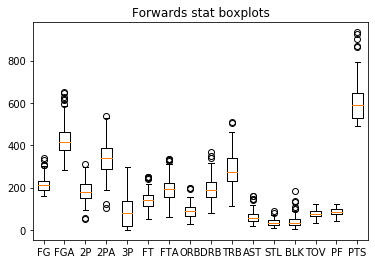

In [75]:
fig, ax = plt.subplots()
ax.boxplot(forwards_dict.values())
ax.set_xticklabels(forwards_dict.keys())
ax.set_title('Forwards stat boxplots')

In [76]:
centers_dict = {'FG' : centers['FG'], 'FGA': centers['FGA'], '2P': centers['2P'], '2PA': centers['2PA'], 
               '3P': centers['3PA'], 'FT': centers['FT'], 'FTA': centers['FTA'], 'ORB':  centers['ORB'], 
               'DRB': centers['DRB'], 'TRB': centers['TRB'], 'AST': centers['AST'], 'STL': centers['STL'], 
               'BLK': centers['BLK'], 'TOV': centers['TOV'], 'PF': centers['PF'], 'PTS': centers['PTS']}

Text(0.5, 1.0, 'Centers stat boxplots')

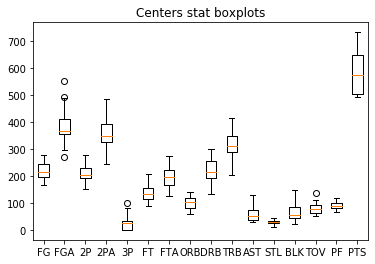

In [77]:
fig, ax = plt.subplots()
ax.boxplot(centers_dict.values())
ax.set_xticklabels(centers_dict.keys())
ax.set_title('Centers stat boxplots')

Text(0.5, 1.0, 'Blocks boxplots by position')

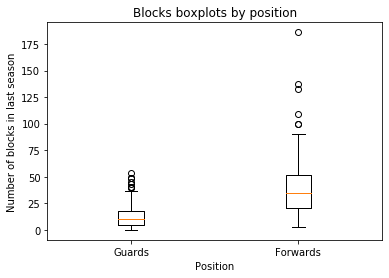

In [78]:
guards_blk = guards['BLK']
forwards_blk = forwards['BLK']

blks = {'Guards': guards_blk, 'Forwards': forwards_blk}

fig, ax = plt.subplots()
ax.boxplot(blks.values())
ax.set_xticklabels(dict.keys())
plt.xlabel('Position')
plt.ylabel('Number of blocks in last season')
ax.set_title('Blocks boxplots by position')

Text(0.5, 1.0, 'Steals boxplots by position')

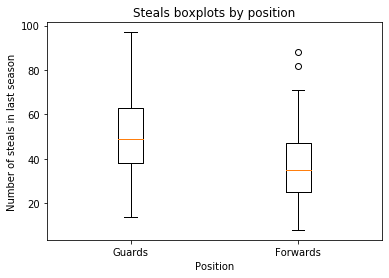

In [79]:
guards_stl = guards['STL']
forwards_stl = forwards['STL']
centers_stl = centers['STL']

stl = {'Guards': guards_stl, 'Forwards': forwards_stl}

fig, ax = plt.subplots()
ax.boxplot(stl.values())
ax.set_xticklabels(dict.keys())
plt.xlabel('Position')
plt.ylabel('Number of steals in last season')
ax.set_title('Steals boxplots by position')

Text(0.5, 1.0, 'Free Throw Attempts boxplots by position')

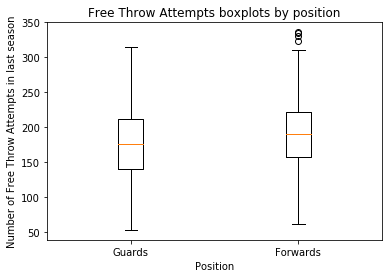

In [80]:
guards_fta = guards['FTA']
forwards_fta = forwards['FTA']

fta = {'Guards': guards_fta, 'Forwards': forwards_fta}

fig, ax = plt.subplots()
ax.boxplot(fta.values())
ax.set_xticklabels(dict.keys())
plt.xlabel('Position')
plt.ylabel('Number of Free Throw Attempts in last season')
ax.set_title('Free Throw Attempts boxplots by position')

Text(0.5, 1.0, 'Defensive Rebound boxplots by position')

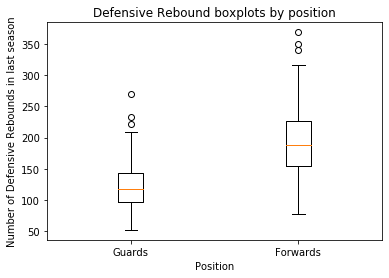

In [81]:
guards_drb = guards['DRB']
forwards_drb = forwards['DRB']


drb = {'Guards': guards_drb, 'Forwards': forwards_drb}

fig, ax = plt.subplots()
ax.boxplot(drb.values())
ax.set_xticklabels(dict.keys())
plt.xlabel('Position')
plt.ylabel('Number of Defensive Rebounds in last season')
ax.set_title('Defensive Rebound boxplots by position')

Text(0.5, 1.0, 'Points boxplots by position')

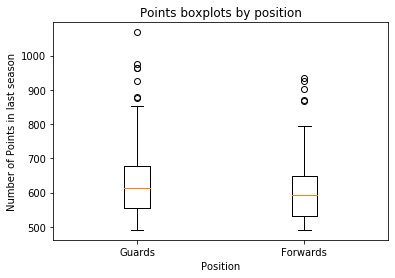

In [82]:
guards_pts = guards['PTS']
forwards_pts = forwards['PTS']

pts = {'Guards': guards_pts, 'Forwards': forwards_pts}

fig, ax = plt.subplots()
ax.boxplot(pts.values())
ax.set_xticklabels(dict.keys())
plt.xlabel('Position')
plt.ylabel('Number of Points in last season')
ax.set_title('Points boxplots by position')